<a href="https://colab.research.google.com/github/xhze2016/Machine-Learning/blob/main/cancer_linearLogReg_combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression is applied to predict whether a given patient is having Malignant or Benign tumor based on the features in the dataset. Noticed that the dataset have 3 groups of features: mean, se and worst, the prediction was performed based on each group of features as well as all features. It turned out the best prediction was using the “worst” group, with the accuracy of 93%, comparing to the 88% with all features. With this machine learning analysis result, it could be suggested less work in the data collection and processing will be needed in the future.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline


In [ ]:
disease_df = pd.read_csv("cancer_ML_csv.csv")
disease_df.drop(['id'], axis = 1)
disease_df.diagnosis = [1 if each == "M" else 0 for each in disease_df.diagnosis]


In [ ]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.diagnosis.value_counts())


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

<ipython-input-4-0d7a48274bb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=disease_df,


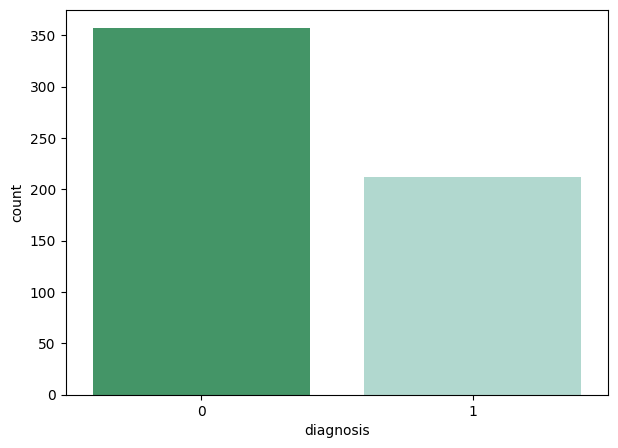

In [ ]:
# counting no. of patients with malignant or benign cancer
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=disease_df,
             palette="BuGn_r")
plt.show()


In [ ]:
  X_mean = np.asarray(disease_df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']])
  X_worst = np.asarray(disease_df[['radius_worst', 'texture_worst',  'perimeter_worst','area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']])
  X_se = np.asarray(disease_df[['radius_se', 'texture_se', 'perimeter_se','area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']])
  X_all = np.asarray(disease_df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','radius_worst', 'texture_worst','perimeter_worst','area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst','radius_se', 'texture_se', 'perimeter_se','area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']])

Train set: (426, 8) (426,)
Test set: (143, 8) (143,)
Accuracy of the model is = 0.8811188811188811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


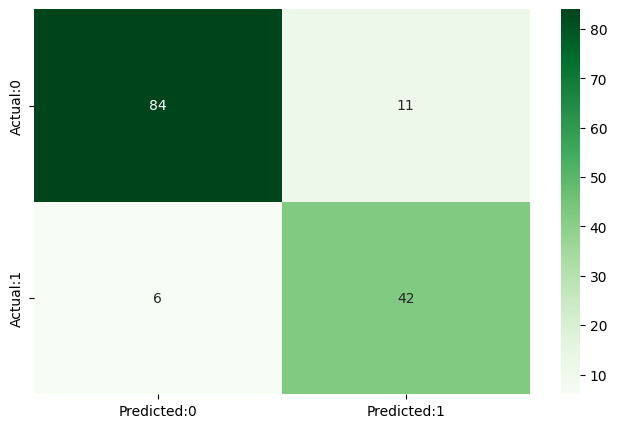

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        95
           1       0.79      0.88      0.83        48

    accuracy                           0.88       143
   macro avg       0.86      0.88      0.87       143
weighted avg       0.89      0.88      0.88       143

Train set: (426, 8) (426,)
Test set: (143, 8) (143,)
Accuracy of the model is = 0.9300699300699301


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


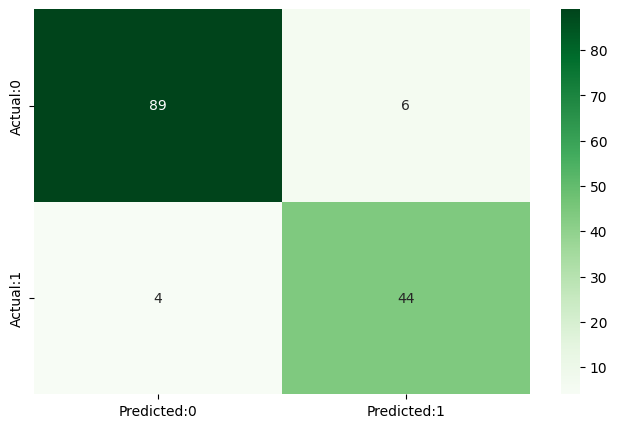

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.88      0.92      0.90        48

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143

Train set: (426, 8) (426,)
Test set: (143, 8) (143,)
Accuracy of the model is = 0.8881118881118881


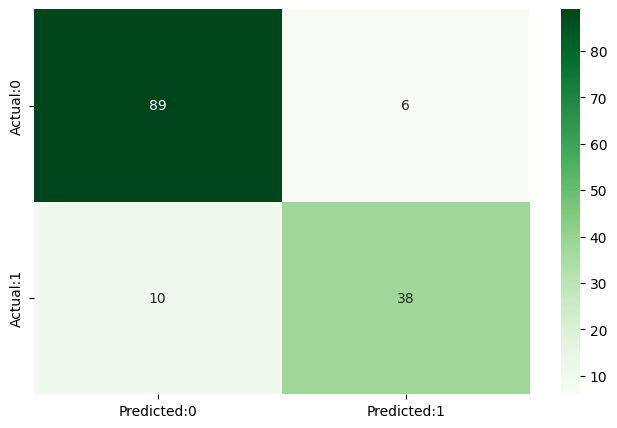

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.86      0.79      0.83        48

    accuracy                           0.89       143
   macro avg       0.88      0.86      0.87       143
weighted avg       0.89      0.89      0.89       143

Train set: (426, 24) (426,)
Test set: (143, 24) (143,)
Accuracy of the model is = 0.8811188811188811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


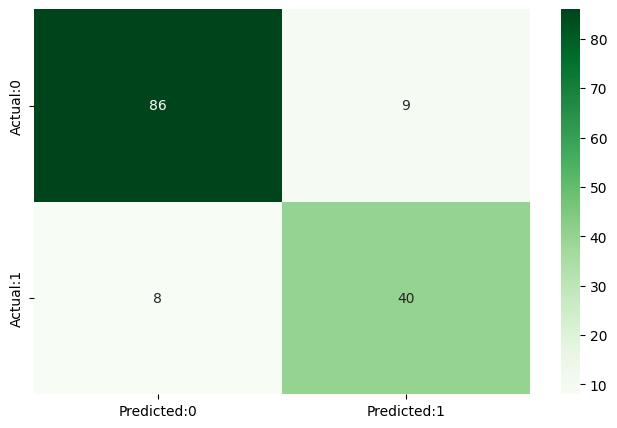

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.82      0.83      0.82        48

    accuracy                           0.88       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.88      0.88      0.88       143



In [ ]:
for X in (X_mean, X_worst, X_se, X_all):

  y = np.asarray(disease_df['diagnosis'])
# Train-and-Test -Split
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 4)

  print ('Train set:', X_train.shape,  y_train.shape)
  print ('Test set:', X_test.shape,  y_test.shape)

# normalization of the dataset
  X = preprocessing.StandardScaler().fit(X).transform(X)
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
# Evaluation and accuracy
  from sklearn.metrics import accuracy_score
  print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))
# Confusion matrix
  from sklearn.metrics import confusion_matrix, classification_report

  cm = confusion_matrix(y_test, y_pred)
  conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

  plt.figure(figsize = (8, 5))
  sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

  plt.show()
  print('The details for confusion matrix is =')
  print (classification_report(y_test, y_pred))

